In [1]:
import numpy as np


# y' = y^2*t
def F_ex1( y, t ):
    return y*y*t

# y(0) = 1
y0_ex1 = 1
t0_ex1 = 0



In [2]:
def explicitEuler(F, y0, ts):
    # For all t in ts it calculates next y with explicit euler
    # prints tn, yn, y'n, dyn
    print(f"tn\tyn\ty'n\tdyn")
    tn = ts[0]
    yn = y0
    for i in range(len(ts)-1):
        yprimen = F( yn, tn )
        dt = ts[i+1] - ts[i]
        dyn = dt*yprimen
        print(f"{tn}\t{yn}\t{yprimen}\t{dyn}")
        tn = ts[i+1]
        yn += dyn
    print(f"{tn}\t{yn}")
        

ts_ex1 = [0, 0.1, 0.2, 0.3 ] #, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
explicitEuler(F_ex1, y0_ex1, ts_ex1)

tn	yn	y'n	dyn
0	1	0	0.0
0.1	1.0	0.1	0.010000000000000002
0.2	1.01	0.20402	0.020401999999999997
0.3	1.030402


In [3]:

def F_ex2( y, t):
    return y/t
y0_ex2 = 2
t0_ex2 = 1
ts_ex2 = [1, 1.1, 1.2, 1.3]
explicitEuler(F_ex2, y0_ex2, ts_ex2)

tn	yn	y'n	dyn
1	2	2.0	0.20000000000000018
1.1	2.2	2.0	0.19999999999999973
1.2	2.4	2.0	0.20000000000000018
1.3	2.6


In [4]:
def F_ex3( y, t):
    return 2*y+1
y0_ex3 = 2
t0_ex3 = 0
ts_ex3 = [0, 0.1, 0.2, 0.3]
explicitEuler(F_ex3, y0_ex3, ts_ex3)

tn	yn	y'n	dyn
0	2	5	0.5
0.1	2.5	6.0	0.6000000000000001
0.2	3.1	7.2	0.7199999999999999
0.3	3.82


In [5]:
# need to solve equation!
import scipy
from scipy.optimize import fsolve

# 3x - 2 = x+3
# make an expression that is zero!
# 3x - 2 - (x + 3)

def expr( x ):
    return 3*x - 2 - (x+3)
x_guess = 1

fsolve(expr, x_guess)

array([2.5])

Solve with fsolve!

$$3\cdot e^{-3x} = 2x$$

$$x^2 - 2x - 3 = 0$$

$$3\cdot\cos(3x+1) = 2$$


In [6]:
import math

def expr_1( x ):
    return 3*math.e**(-3*x)-2*x

fsolve(expr_1, 0)

array([0.4224126])

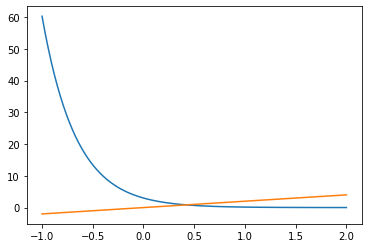

In [7]:
from matplotlib import pyplot as plt
xs = np.linspace(-1, 2, 101)
plt.plot( xs, 3*np.e**(-3*xs))
plt.plot( xs, 2*xs)


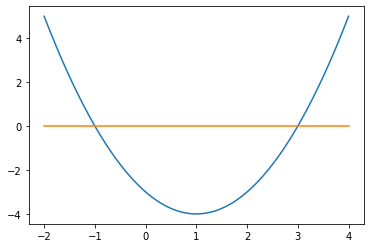

In [8]:
xs = np.linspace(-2, 4, 101)
plt.plot( xs, xs**2-2*xs-3 )
plt.plot( xs, [0]*len(xs))


In [9]:
def expr_2( x ):
    return x*x - 2*x - 3

fsolve(expr_2, 2)

array([3.])

In [10]:
sol_s = [ fsolve(expr_2, x_ ) for x_ in xs]


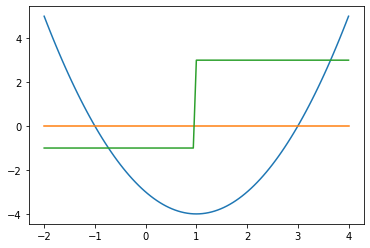

In [11]:
xs = np.linspace(-2, 4, 101)
plt.plot( xs, xs**2-2*xs-3 )
plt.plot( xs, [0]*len(xs))
plt.plot( xs, sol_s)


In [12]:

def expr_3( x ):
    return 3*np.cos( 3*x + 1) - 2

fsolve( expr_3, 0 )

array([-0.05297711])

(-5.0, 5.0)

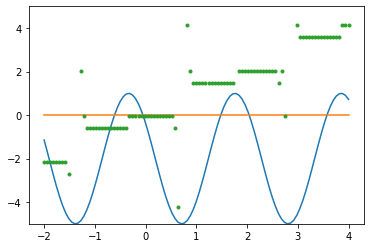

In [13]:
plt.plot( xs, 3*np.cos(3*xs + 1)- 2)
plt.plot( xs, [0]*len(xs))
sol_s = [ fsolve(expr_3, x_) for x_ in xs]
plt.plot(xs, sol_s, '.')
plt.ylim([-5, 5])

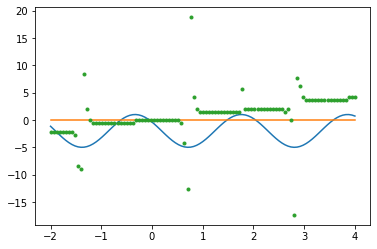

In [14]:
plt.plot( xs, 3*np.cos(3*xs + 1)- 2)
plt.plot( xs, [0]*len(xs))
sol_s = [ fsolve(expr_3, x_) for x_ in xs]
plt.plot(xs, sol_s, '.')

In [15]:

def solveImplicit( yn, dt, tnp1, F):
    expr = lambda ynp1 : ( ynp1 - yn )/dt - F(ynp1, tnp1)
    return fsolve( expr, yn )[0]
#   return fsolve( expr, yn + dt*F(yn, tnp1-dt))

def implicitEuler(F, y0, ts):
    # For all t in ts it calculates next y with explicit euler
    # prints tn, yn, y'n, dyn
    print(f"tn\tyn")
    tn = ts[0]
    yn = y0
    for i in range(len(ts)-1):
#        yprimen = F( yn, tn )
        dt = ts[i+1] - ts[i]
        tnp1 = ts[i+1]
        ynp1 = solveImplicit( yn, dt, tnp1, F)
#        dyn = dt*yprimen
        print(f"{tn}\t{yn}")
        tn = tnp1
        yn = ynp1
    print(f"{tn}\t{yn}")

implicitEuler(F_ex1, y0_ex1, ts_ex1)

tn	yn
0	1
0.1	1.010205144336438
0.2	1.031484343347873
0.3	1.065545991123878


In [16]:
implicitEuler(F_ex2, y0_ex2, ts_ex2)

tn	yn
1	2
1.1	2.2
1.2	2.4
1.3	2.6


In [17]:
implicitEuler(F_ex3, y0_ex3, ts_ex3)

tn	yn
0	2
0.1	2.625
0.2	3.40625
0.3	4.3828125


In [19]:
def solveTheta( yn, dt, tnp1, F, theta):
    expr = lambda ynp1 : ( ynp1 - yn )/dt - theta*F(ynp1, tnp1)-(1-theta)*F(yn,tnp1-dt)
    return fsolve( expr, yn )[0]
#   return fsolve( expr, yn + dt*F(yn, tnp1-dt))

def thetaEuler(F, y0, ts, theta):
    # For all t in ts it calculates next y with explicit euler
    # prints tn, yn, y'n, dyn
    print(f"tn\tyn")
    tn = ts[0]
    yn = y0
    for i in range(len(ts)-1):
#        yprimen = F( yn, tn )
        dt = ts[i+1] - ts[i]
        tnp1 = ts[i+1]
        ynp1 = solveTheta( yn, dt, tnp1, F, theta)
#        dyn = dt*yprimen
        print(f"{tn}\t{yn}")
        tn = tnp1
        yn = ynp1
    print(f"{tn}\t{yn}")

thetaEuler(F_ex1, y0_ex1, ts_ex1, 0.5)

tn	yn
0	1
0.1	1.0050506338833465
0.2	1.020515792596073
0.3	1.0473855652601831


In [20]:
thetaEuler(F_ex3, y0_ex3, ts_ex3, 0.5)

tn	yn
0	2
0.1	2.5555555555555554
0.2	3.2345679012345676
0.3	4.064471879286693


In [21]:
# investigate accuracy with decreasing step size

def sol_ex1( t ):
    return 2 / ( 2 - t**2)

def sol_ex2( t ):
    return 2*t

def sol_ex3( t ):
    return 2.5*np.e**(2*t)-0.5



In [47]:
# Lets do a timestep of .3. Compare accurracy as timesteps to reach .3 increase with 10**N

Ns = [ 0, 1, 2, 3, 4 ]

N = 10
# solve with N=10 for explicit Euler
def tsf( N, t0 ):
    return np.linspace( t0, t0+0.3, N+1 )

def explicitEuler(F, y0, ts):
    # For all t in ts it calculates next y with explicit euler
    # prints tn, yn, y'n, dyn
    # print(f"tn\tyn\ty'n\tdyn")
    tn = ts[0]
    yn = y0
    for i in range(len(ts)-1):
        yprimen = F( yn, tn )
        dt = ts[i+1] - ts[i]
        dyn = dt*yprimen
        # print(f"{tn}\t{yn}\t{yprimen}\t{dyn}")
        tn = ts[i+1]
        yn += dyn
    # print(f"{tn}\t{yn}")
    return yn



In [50]:
%%timeit
res_ee_ex1 = np.array([ explicitEuler(F_ex1, y0_ex1, tsf( 10**N, t0_ex1)) for N in Ns ])


18.5 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
res_ee_ex1 = np.array([ explicitEuler(F_ex1, y0_ex1, tsf( 10**N, t0_ex1)) for N in Ns ])
err_ee_ex1 = abs(res_ee_ex1 - np.array([ sol_ex1( 0.3 ) ]* len(res_ee_ex1)))

In [36]:
%%timeit
res_ee_ex2 = np.array([ explicitEuler(F_ex2, y0_ex2, tsf( 10**N, t0_ex2)) for N in Ns ])


172 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
res_ee_ex2 = np.array([ explicitEuler(F_ex2, y0_ex2, tsf( 10**N, t0_ex2)) for N in Ns ])
print(res_ee_ex2 - np.array([ sol_ex2( 1.3 ) ]* len(res_ee_ex2)))

[0. 0. 0. 0. 0. 0.]


In [40]:
%%timeit
res_ee_ex3 = np.array([ explicitEuler(F_ex3, y0_ex3, tsf( 10**N, t0_ex3)) for N in Ns ])


219 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
res_ee_ex3 = np.array([ explicitEuler(F_ex3, y0_ex3, tsf( 10**N, t0_ex3)) for N in Ns ])
print(res_ee_ex3 - np.array([ sol_ex3( 0.3 ) ]* len(res_ee_ex3)))

[-5.55297001e-01 -7.81777596e-02 -8.15956680e-03 -8.19551894e-04
 -8.19913285e-05 -8.19949434e-06]


In [42]:
def implicitEuler(F, y0, ts):
    # For all t in ts it calculates next y with explicit euler
    # prints tn, yn, y'n, dyn
#    print(f"tn\tyn")
    tn = ts[0]
    yn = y0
    for i in range(len(ts)-1):
#        yprimen = F( yn, tn )
        dt = ts[i+1] - ts[i]
        tnp1 = ts[i+1]
        ynp1 = solveImplicit( yn, dt, tnp1, F)
#        dyn = dt*yprimen
#        print(f"{tn}\t{yn}")
        tn = tnp1
        yn = ynp1
#    print(f"{tn}\t{yn}")
    return yn


In [46]:
%%timeit
Ns = [ 0, 1, 2, 3, 4 ]
res_ie_ex1 = np.array([ implicitEuler(F_ex1, y0_ex1, tsf( 10**N, t0_ex1)) for N in Ns ])


1.7 s ± 297 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
res_ie_ex1 = np.array([ implicitEuler(F_ex1, y0_ex1, tsf( 10**N, t0_ex1)) for N in Ns ])
err_ie_ex1 = abs(res_ie_ex1 - np.array([ sol_ex1( 0.3 ) ]* len(res_ie_ex1)))

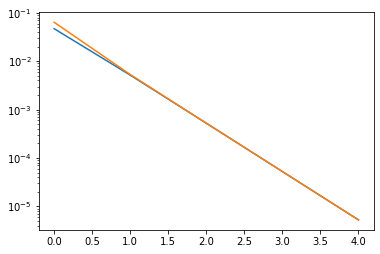

In [61]:
plt.semilogy(Ns, err_ee_ex1)
plt.semilogy(Ns, err_ie_ex1)

In [62]:
def thetaEuler(F, y0, ts, theta):
    # For all t in ts it calculates next y with explicit euler
    # prints tn, yn, y'n, dyn
    # print(f"tn\tyn")
    tn = ts[0]
    yn = y0
    for i in range(len(ts)-1):
#        yprimen = F( yn, tn )
        dt = ts[i+1] - ts[i]
        tnp1 = ts[i+1]
        ynp1 = solveTheta( yn, dt, tnp1, F, theta)
#        dyn = dt*yprimen
    #    print(f"{tn}\t{yn}")
        tn = tnp1
        yn = ynp1
    # print(f"{tn}\t{yn}")
    return yn


In [64]:
%%timeit
Ns = [ 0, 1, 2, 3, 4 ]
res_te_ex1 = np.array([ thetaEuler(F_ex1, y0_ex1, tsf( 10**N, t0_ex1), 0.5) for N in Ns ])


2.06 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
res_te_ex1 = np.array([ thetaEuler(F_ex1, y0_ex1, tsf( 10**N, t0_ex1), 0.5) for N in Ns ])
err_te_ex1 = abs(res_te_ex1 - np.array([ sol_ex1( 0.3 ) ]* len(res_te_ex1)))
err_te_ex1

array([2.45164989e-03, 2.37881417e-05, 2.37807868e-07, 2.37806974e-09,
       2.37752040e-11])

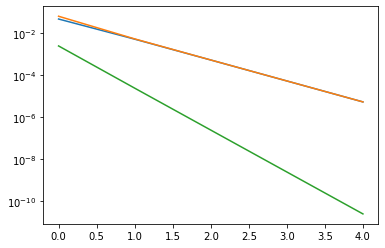

In [66]:
plt.semilogy(Ns, err_ee_ex1)
plt.semilogy(Ns, err_ie_ex1)
plt.semilogy(Ns, err_te_ex1)
